# Predictive Modeling and Analysis of Chemical Parameters for Water Compliancy 

## Objective:

- To analyze which chemical parameters could cause water samples to be taken for compliance monotoring.
- Create a model to predict whether a water sample will be taken for compliance monitoring given what and how much chemicals were found.

# Dataset

Water quality dataset from kaggle avaliable at:
https://www.kaggle.com/datasets/krishnanshverma/england-water-quality

From the site:
"This dataset was scraped from an official government website and contains water quality sampling data collected from multiple locations, primarily rivers and sewage effluents, during the period of January 2025 to February 2025. The dataset provides detailed measurements of various chemical and physical properties of water, including ammonia levels, water temperature, and other determinands."

## Parameters

These are the Parameters given to us from the kaggle dataset.

sample.samplingPoint.notation - Unique identifier for each sampling point.

sample.samplingPoint.label - Name or description of the sampling location.

sample.sampleDateTime - Date and time when the sample was collected.

determinand.label - The type of substance measured (e.g., Ammonia(N), Water Temperature).

determinand.definition - A detailed description of the measured determinand.

determinand.notation - Numerical range or classification of the determinand values.

result - The measured value of the determinand in the sample.

determinand.unit.label - Unit of measurement (e.g., mg/l, °C).

sample.sampledMaterialType.label - Type of water source (e.g., River, Final Sewage Effluent).

sample.isComplianceSample - Boolean flag indicating whether the sample was taken for compliance monitoring.

In [179]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict

## The Dataset

In [181]:
df = pd.read_csv('water_quality.csv')
df.head(10)

,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,result,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing
0,AN-011624,APOLLO OFFICE UNITS RADCLIVE RD GAWCOTT,2025-01-13T12:04:00,Oil & Grs Vs,"Visible oil or grease, significant trace: Pres...",664,0.00000,pres/nf,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),467993,232851
1,AN-011624,APOLLO OFFICE UNITS RADCLIVE RD GAWCOTT,2025-01-13T12:04:00,BOD ATU,BOD : 5 Day ATU,85,4.00000,mg/l,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),467993,232851
2,AN-011624,APOLLO OFFICE UNITS RADCLIVE RD GAWCOTT,2025-01-13T12:04:00,Ammonia(N),Ammoniacal Nitrogen as N,111,0.50000,mg/l,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),467993,232851
3,AN-011624,APOLLO OFFICE UNITS RADCLIVE RD GAWCOTT,2025-01-13T12:04:00,Sld Sus@105C,"Solids, Suspended at 105 C",135,3.00000,mg/l,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),467993,232851
4,AN-01M05,R.OUSE FULWELL CROSSING,2025-01-14T13:57:00,NH3 un-ion,Ammonia un-ionised as N,119,0.00113,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,462655,234551
5,AN-01M05,R.OUSE FULWELL CROSSING,2025-01-14T13:57:00,Orthophospht,"Orthophosphate, reactive as P",180,0.09700,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,462655,234551
6,AN-01M05,R.OUSE FULWELL CROSSING,2025-01-14T13:57:00,Alky pH 4.5,Alkalinity to pH 4.5 as CaCO3,162,260.00000,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,462655,234551
7,AN-01M05,R.OUSE FULWELL CROSSING,2025-01-14T13:57:00,Cond @ 25C,Conductivity at 25 C,77,755.00000,us/cm,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,462655,234551
8,AN-01M05,R.OUSE FULWELL CROSSING,2025-01-14T13:57:00,pH,pH,61,8.09000,phunits,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,462655,234551
9,AN-01M05,R.OUSE FULWELL CROSSING,2025-01-14T13:57:00,N Oxidised,"Nitrogen, Total Oxidised as N",116,8.20000,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,462655,234551


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81026 entries, 0 to 81025
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   sample.samplingPoint.notation     81026 non-null  object 
 1   sample.samplingPoint.label        81026 non-null  object 
 2   sample.sampleDateTime             81026 non-null  object 
 3   determinand.label                 81026 non-null  object 
 4   determinand.definition            81026 non-null  object 
 5   determinand.notation              81026 non-null  int64  
 6   result                            81026 non-null  float64
 7   determinand.unit.label            81026 non-null  object 
 8   sample.sampledMaterialType.label  81026 non-null  object 
 9   sample.isComplianceSample         81026 non-null  bool   
 10  sample.purpose.label              81026 non-null  object 
 11  sample.samplingPoint.easting      81026 non-null  int64  
 12  samp

It seems that each entry represents a parameter found at a location.

Now what we would like to do is have the chemical parameters found at a location to be our features for predicting whether a sample will be taken for compliance monitoring.

I would like to see how many different paramters there are to consider.

In [185]:
chem_parameters = df[['determinand.label','determinand.definition','determinand.notation','determinand.unit.label']].drop_duplicates(ignore_index=True)

In [186]:
chem_parameters.head()

,determinand.label,determinand.definition,determinand.notation,determinand.unit.label
0,Oil & Grs Vs,"Visible oil or grease, significant trace: Pres...",664,pres/nf
1,BOD ATU,BOD : 5 Day ATU,85,mg/l
2,Ammonia(N),Ammoniacal Nitrogen as N,111,mg/l
3,Sld Sus@105C,"Solids, Suspended at 105 C",135,mg/l
4,NH3 un-ion,Ammonia un-ionised as N,119,mg/l


Scrolling through these parameters I can already notice some possibly irrelevant or unhelpful variables

- NO FLOW/SAMP
- FLOW I/s
- Site Inspection
- Flow Type
- HtrlTW (Time of sampling relative to previous high water)
- NGR Easting
- NGR Northing
- Cypermeth ID
- Flow Tot Dly
- Flow Instant
- Photo Taken
- D Site Insp
- NATGRIDREF
- Site Number

## Data Cleaning and Wrangling

In [189]:
variables_to_be_removed = [
    "NO FLOW/SAMP",
    "FLOW I/s",
    "Site Inspection",
    "Flow Type",
    "HtrlTW",
    "NGR Easting",
    "NGR Northing",
    "Cypermeth ID",
    "Flow Instant",
    "Photo Taken",
    "D Site Insp",
    "NATGRIDREF",
    "Site Number",
    "SzRnWtSmall",
    "SzRnWtLarge",
    "SzRnWtMean",
    "Site Inspect",
]

df_cleaned = df[~df['determinand.label'].isin(variables_to_be_removed)].reset_index(drop=True)
relevant_chem_parameters = chem_parameters[~chem_parameters['determinand.label'].isin(variables_to_be_removed)].reset_index(drop=True)

We now make a new dataset where we have the determinand labels as features and the results as the data

We need to also combine entries refrencing the same sampling point and sampling date and time

In addition we will remove variables not helpful for predicting compliancy

In [191]:
df_cleaned = df_cleaned.drop(columns=[
    'determinand.definition',
    'determinand.notation',
    'determinand.unit.label',
    'sample.sampledMaterialType.label',
    'sample.samplingPoint.easting',
    'sample.samplingPoint.northing',
    'sample.purpose.label'])

Now that we only have relavent information we need to reorganize the data for modeling

In [193]:
# We will use a dictionary to reorganize the data.
# Our Values will be a list of tuples containing determinand and result and 
# Our Keys will be a tuple containing sampling point identification information
data_dict = defaultdict(list)
# keys = df[['sample.samplingPoint.notation','sample.samplingPoint.label','sample.sampleDateTime','sample.isComplianceSample']].drop_duplicates(ignore_index=True)

for index, entry in df_cleaned.iterrows():
    data_dict[(entry['sample.samplingPoint.notation'],
               entry['sample.samplingPoint.label'],
               entry['sample.sampleDateTime'],
               entry['sample.isComplianceSample'])].append((entry['determinand.label'],entry['result']))
    

In [194]:
df_cleaned = df_cleaned.drop(columns=['determinand.label','result'])

In [195]:
df_cleaned = df_cleaned.drop_duplicates().reset_index(drop=True)

In [196]:
for parameter in relevant_chem_parameters['determinand.label']:
    df_cleaned[parameter] = 0

In [197]:
for i, entry in enumerate(data_dict):
    for label, result in data_dict[entry]:
        df_cleaned.at[i,label] = result

In [198]:
df_cleaned

,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,sample.isComplianceSample,Oil & Grs Vs,BOD ATU,Ammonia(N),Sld Sus@105C,NH3 un-ion,Orthophospht,...,DDT (PP),PCB Con 156,Chloroprophm,t-Hept Epox,"1,3,5-TCB","2,3,5,6-Tetr",Tecnazene,PAHs,Methanal,Beryllium-Be
0,AN-011624,APOLLO OFFICE UNITS RADCLIVE RD GAWCOTT,2025-01-13T12:04:00,True,0,4,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AN-01M05,R.OUSE FULWELL CROSSING,2025-01-14T13:57:00,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AN-01M07,R.OUSE BOURTON MILL,2025-01-14T12:31:00,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AN-01M14,R.OUSE WATER STRATFORD RD.BR.,2025-01-07T12:51:00,False,0,0,0,39,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AN-02M13,PADBURY BK.TRIB.OUSE A421 RD.BR.THORNB',2025-01-27T14:40:00,False,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062,TH-SSN0187,ABOVE DORN AT B4030 - BARTON BUSHES STRE,2025-01-06T12:52:00,False,0,0,0,20,0,0,...,0,0,0,0,0,0,0,0,0,0
7063,TH-SSN0251,SSN0251 DEAN WOOD,2025-01-06T11:50:00,False,0,0,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
7064,TH-SSN0911,SSN0911 EGG BARN WOOD,2025-01-03T10:43:00,False,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
7065,TH-SSN0959,SSN0959 U/S ADWELL ROAD,2025-01-03T12:57:00,False,0,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,0


This concludes our cleaning and wrangling of the data

## Handeling Class Imbalence

### Checking for Class Imbalence

<AxesSubplot:>

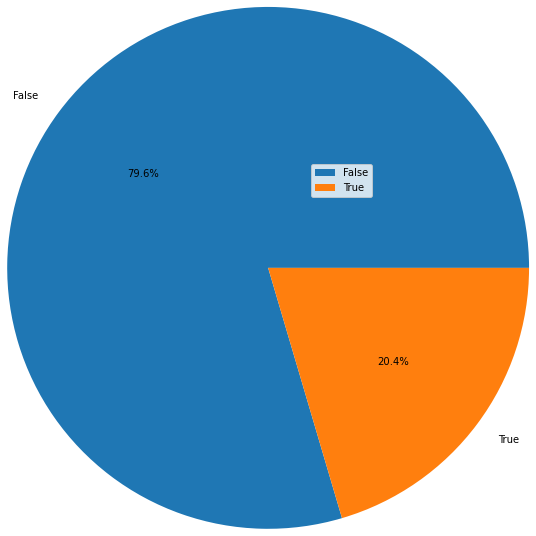

In [202]:
df_cleaned.groupby(['sample.isComplianceSample']).count().plot(kind='pie',
                                                               y='sample.samplingPoint.notation',
                                                               autopct='%1.1f%%',
                                                               radius=3,
                                                               ylabel="")


### Strategy 

In order to make the data more balanced I will increase the weight of the True class

## Preprocessing

Straight forward 80/20 split will be implemented. Also will use kfold for validation.

In [207]:
X = df_cleaned.iloc[:,4:].values
Y = df_cleaned['sample.isComplianceSample'].values

In [208]:
#kfold = KFold(n_splits=3, random_state=7, shuffle=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,random_state=7)

In [209]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model

We will use logistic regression for this classification problem

I will be working with the following parameters:

**penalty** - 'l2': I didn't find any difference between using l1 and l2 regularization, but i would prefer the parameters not be strictly reduced to 0 because of how many parameters i have and would like to see how each parameter impacts the model. I would like to have regularization in general because my model might overfit otherwise.

**max_iter** - 10000: due to the large amounts of high dimensional data this amount of iterations makes it so that the model will converge.

**solver** - 'sag': since im deciding on going with l2 regularization and my dataset is large sag (Stochastic Average Gradient) is the optimal choice since on l2 regularization it's faster than saga which is another solver that works well with large datasets.

**class_weight** - 'balanced':This is our way of handleling our unbalanced data. I don't think other ways to handle unbalanced data are necessary or optimal. I was considering implementing SMOTE.

**C** - 10: I found that a weaker regularization increases accuracy.

In [213]:
model = LogisticRegression(penalty='l2',max_iter=10000,solver='sag',class_weight='balanced',C=10)

In [214]:
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
kfold_scores = cross_val_score(model, X_train_scaled, Y_train, cv=kfold)
kfold_scores

array([0.95013263, 0.94798301, 0.94320594])

not a lot of variance

In [216]:
model.fit(X_train_scaled,Y_train)

LogisticRegression(C=10, class_weight='balanced', max_iter=10000, solver='sag')

In [217]:
prediction = model.predict(X_test_scaled)

In [218]:
cm = confusion_matrix(y_true=Y_test, y_pred=prediction)

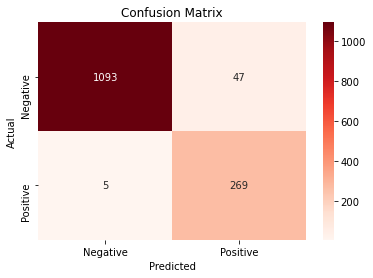

In [219]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [220]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

       False       1.00      0.96      0.98      1140
        True       0.85      0.98      0.91       274

    accuracy                           0.96      1414
   macro avg       0.92      0.97      0.94      1414
weighted avg       0.97      0.96      0.96      1414



I am pleased with this accuracy report. Logistic Regression was a good choice

Accuracy and f1-scores are high, but the most import metric is recall for the true class. it's important to make sure that all entries that are non-compliant get labeled as such even if it sacrifices precision. It's better to be safe

In [222]:
coefficients = model.coef_

In [223]:
coefficients.shape

(1, 341)

In [224]:
df_cleaned.iloc[:,4:].columns

Index(['Oil & Grs Vs', 'BOD ATU', 'Ammonia(N)', 'Sld Sus@105C', 'NH3 un-ion',
       'Orthophospht', 'Alky pH 4.5', 'Cond @ 25C', 'pH', 'N Oxidised',
       ...
       'DDT (PP)', 'PCB Con 156', 'Chloroprophm', 't-Hept Epox', '1,3,5-TCB',
       '2,3,5,6-Tetr', 'Tecnazene', 'PAHs', 'Methanal', 'Beryllium-Be'],
      dtype='object', length=341)

We will now tie the feature names to the coefficients so we can find the most influential coefficients and the coefficients that played little to no role in compliancy.

In [226]:
coef_df = pd.DataFrame({"feature": df_cleaned.iloc[:,4:].columns, "coefficient": coefficients[0]})
coef_df.head(5)

,feature,coefficient
0,Oil & Grs Vs,0.051403
1,BOD ATU,0.085410
2,Ammonia(N),-0.142149
3,Sld Sus@105C,-0.246902
4,NH3 un-ion,0.000000


In [227]:
ordered_coef_df=coef_df.sort_values(by='coefficient',key= lambda coef:abs(coef),ascending=False)
ordered_coef_df.head(5)

,feature,coefficient
24,Nitrogen - N,-6.992969
37,C - Org Filt,-1.939587
30,Zinc - as Zn,-1.879371
12,Oxygen Diss,-1.754991
35,Mg Filtered,-1.593023


In [228]:
ordered_coef_df[ordered_coef_df['coefficient'] > 0].head(5)

,feature,coefficient
45,Iron - as Fe,1.463150
15,Phosphorus-P,0.942154
14,Nitrate-N,0.866312
32,Nickel - Ni,0.655010
33,Cadmium - Cd,0.353646


Seems among the wide variaty of parameters Nitrogen stands out as the most influential variable. Iron being the most influential in determining the positive class and Nitrogen for the negative class. Other variables that influence in a positive direction are phosphorus, Nickel and nitrate.

# Refrences

“Essential Math for Data Science by Thomas Nield (O’Reilly). Copyright 2022 Thomas Nield, 978-1-098-10293-7.”

“Practical Statistics for Data Scientists by Peter Bruce, Andrew Bruce, and Peter Gedeck (O’Reilly). Copyright 2020 Peter Bruce, Andrew Bruce, and Peter Gedeck, 978-1-492-07294-2.”

Scikit-learn developers. sklearn.linear_model.LogisticRegression. Scikit-learn, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

Scikit-learn developers. “sklearn.model_selection.cross_val_score.” Scikit-learn, n.d., https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html. 